In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools
from sklearn.metrics import roc_curve, roc_auc_score

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       164
           1       0.90      0.95      0.92       144

    accuracy                           0.93       308
   macro avg       0.93      0.93      0.93       308
weighted avg       0.93      0.93      0.93       308



0.9253246753246753

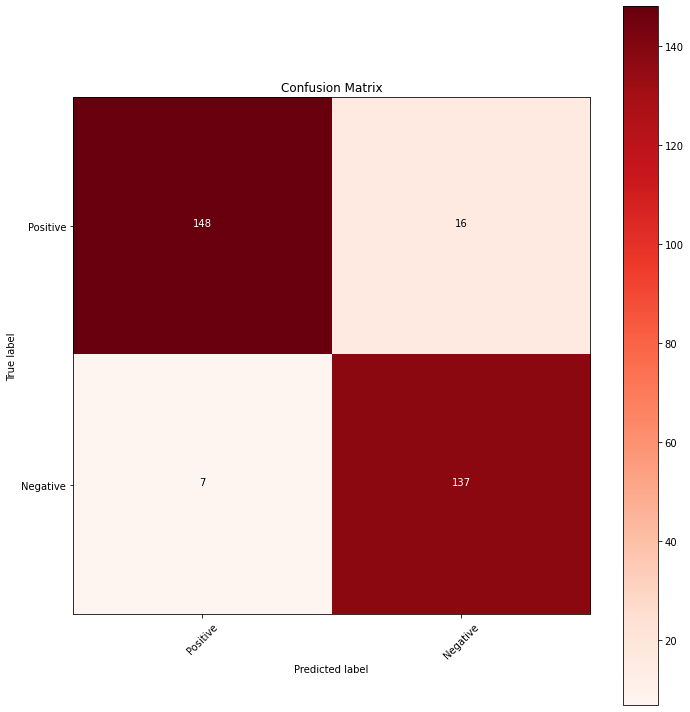

In [2]:
data = pd.read_csv(r'C:\Users\hp\Desktop\heart.csv')

# =========================To understand the dataset better=====================================#
#print("(Rows, columns): " + str(data.shape)) # to know the amount of rows and columns
#print(data.columns) # to print the columns
#print(data.nunique(axis=0)) # to find unique values
#print(data.describe()) # summarize the count, mean, std deviation, min, max for numeric variables
#print(data.isna().sum()) # to find missing values
#data['target'].value_counts() # To know if there is a good proportion between our positve and negative binary indicator

# calculating the correlation matrix to understand the relationship of features and targets
#corr = data.corr()
#plt.subplots(figsize=(15,10))
#sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True, cmap=sns.diverging_palette
           #(220, 20, as_cmap=True))
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette
           #(220, 20, as_cmap=True))
    
# Filtering data by POSITIVE and NEGATIVE heart disease patient
#pos_data = data[data['target']==1]
#(pos_data.describe())

#pos_data = data[data['target']==0]
#pos_data.describe()


#===========================preparing Data for medeling=========================================
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)


sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#=================================MODELING AND TRAINING FOR SVM=====================================#
model1 = SVC(random_state=1)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))

#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(y_test, y_pred1)
target_names = ["Positive", "Negative"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(y_test, y_pred1)







# work done by fortave 


roc_auc_score for SVM:  0.9269139566395664


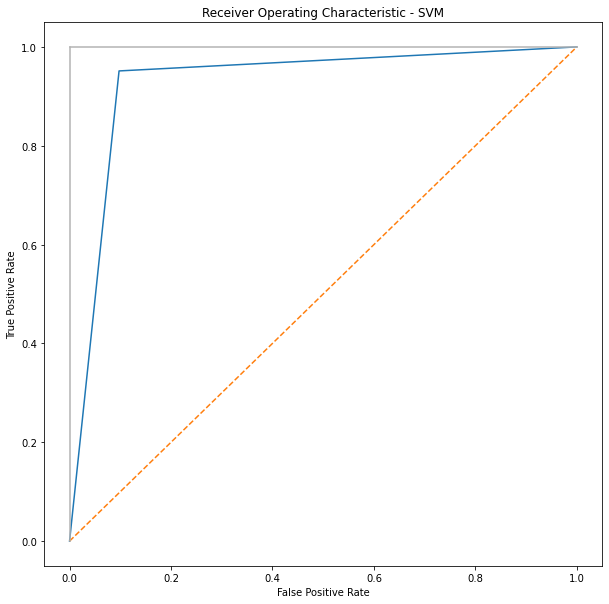

In [17]:
# plot for SVM
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred1)
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_pred1))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.79      0.85       164
           1       0.79      0.92      0.85       144

    accuracy                           0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.86      0.85      0.85       308



0.8474025974025974

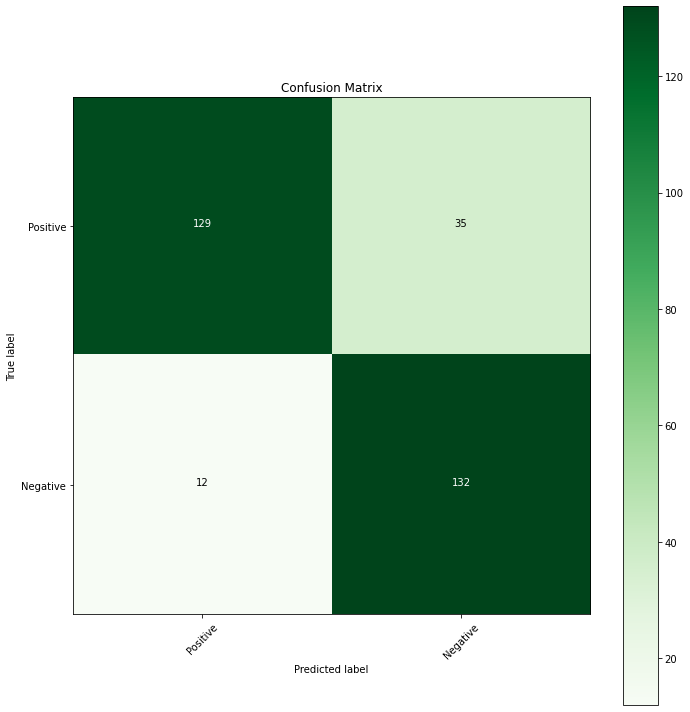

In [9]:

#===========================MODEL TRAINING FOR NAIVE BAYES======================================#
model2 = GaussianNB()
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
cm1 = confusion_matrix(y_test, y_pred2)
print(classification_report(y_test, y_pred2))

def plot_confusion_matrix1(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Greens):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
target_names = ["Positive", "Negative"]
plot_confusion_matrix1(cm1, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(y_test, y_pred2)

roc_auc_score for Naive_bayes:  0.8516260162601625


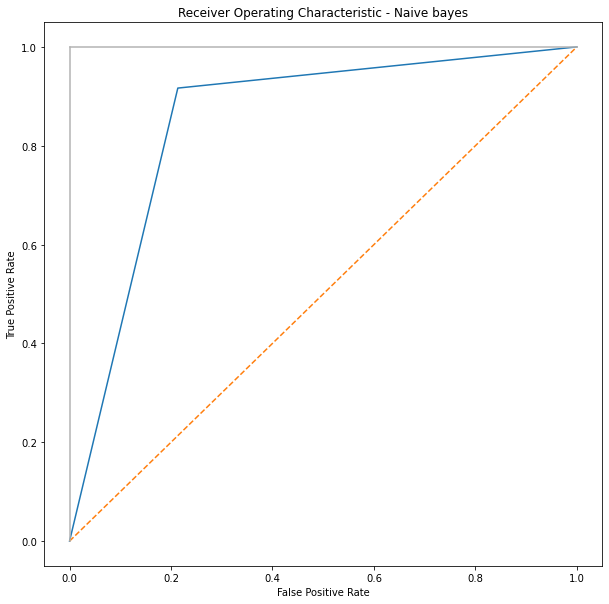

In [16]:
# plot for naive bayes
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_pred2)
print('roc_auc_score for Naive_bayes: ', roc_auc_score(y_test, y_pred2))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Naive bayes')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       164
           1       0.97      0.96      0.97       144

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



0.9675324675324676

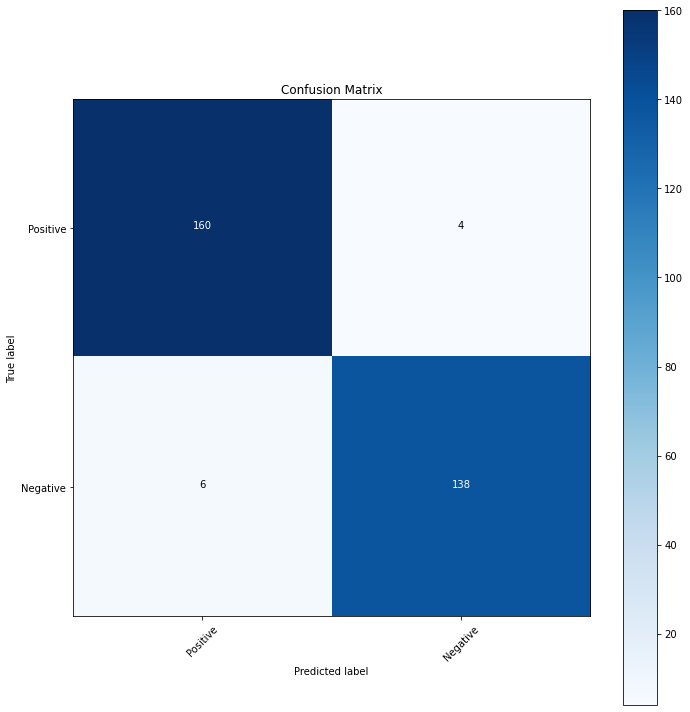

In [15]:
model3 = RandomForestClassifier(random_state=1)
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
cm2 = confusion_matrix(y_test, y_pred3)
print(classification_report(y_test, y_pred3))

def plot_confusion_matrix1(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
target_names = ["Positive", "Negative"]
plot_confusion_matrix1(cm2, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(y_test, y_pred3)

roc_auc_score for RFC:  0.9669715447154472


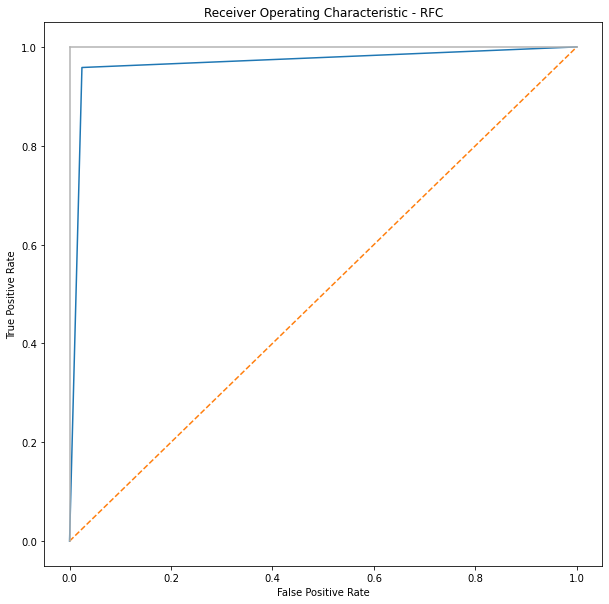

In [14]:
# plot for RandomForestClassifier
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_pred3)
print('roc_auc_score for RFC: ', roc_auc_score(y_test, y_pred3))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RFC')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()